##  Importing Libraries

In [1]:
# Libraries for data manipulation and analysis
import pandas as pd
import numpy as np
# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries for Model 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, roc_auc_score



## Loading the Data

In [4]:
# import csv file using pandas lib  
data = pd.read_csv("credit-card_customers.csv")
data.head()


,Customer_Number,Attrition_Flag,Age,Date_of_birth,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,3708092208,Existing Customer,45,6/9/1979,F,3,High School,Married,Less than $40K,Blue,...,3,3,3544.0,1661,1883.0,0.831,15149,111,0.734,0.469
1,3708093408,Attrited Customer,58,5/28/1966,M,0,Unknown,Single,$40K - $60K,Blue,...,1,3,3421.0,2517,904.0,0.992,992,21,0.400,0.736
2,3708094683,Attrited Customer,46,6/29/1978,M,3,Doctorate,Divorced,$80K - $120K,Blue,...,3,3,8258.0,1771,6487.0,0.000,1447,23,0.000,0.214
3,3708095583,Existing Customer,34,6/23/1990,F,2,Uneducated,Single,Less than $40K,Blue,...,2,2,1438.3,0,1438.3,0.827,3940,82,0.952,0.000
4,3708097083,Existing Customer,49,3/12/1975,F,2,Uneducated,Married,Unknown,Blue,...,5,2,3128.0,749,2379.0,0.598,4369,59,0.735,0.239


### Data Overview

In [5]:
# Get data info (data types and missing values)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12126 entries, 0 to 12125
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Number           12126 non-null  int64  
 1   Attrition_Flag            12026 non-null  object 
 2   Age                       12126 non-null  int64  
 3   Date_of_birth             12126 non-null  object 
 4   Gender                    11926 non-null  object 
 5   Dependent_count           12126 non-null  int64  
 6   Education_Level           11926 non-null  object 
 7   Marital_Status            12126 non-null  object 
 8   Income_Category           12126 non-null  object 
 9   Card_Category             11924 non-null  object 
 10  Months_on_book            12126 non-null  int64  
 11  Total_Relationship_Count  12126 non-null  int64  
 12  Months_Inactive_12_mon    12126 non-null  int64  
 13  Contacts_Count_12_mon     12126 non-null  int64  
 14  Credit

- we found less than 12126 in
1. Attrition_Flag,
2. Gender,
3. Education_level,
4. Card_category 
- we found data type of Date is object we need to convert this data type to date time

In [6]:
# View summary statistics of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,12126.0,3.742948e+09,3.786269e+07,3.708092e+09,3.713645e+09,3.719272e+09,3.779080e+09,3.828353e+09
Age,12126.0,4.672967e+01,1.250832e+01,5.000000e+00,4.100000e+01,4.600000e+01,5.200000e+01,1.200000e+02
Dependent_count,12126.0,2.344302e+00,1.289627e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
Months_on_book,12126.0,3.584257e+01,7.959591e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
Total_Relationship_Count,12126.0,3.810407e+00,1.552042e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
Months_Inactive_12_mon,12126.0,2.347188e+00,1.008596e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Contacts_Count_12_mon,12126.0,2.452251e+00,1.104960e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
Credit_Limit,12126.0,8.268303e+03,8.964527e+03,0.000000e+00,2.454500e+03,4.182000e+03,1.057200e+04,3.451600e+04
Total_Revolving_Bal,12126.0,1.178020e+03,8.203924e+02,0.000000e+00,4.650000e+02,1.293000e+03,1.800000e+03,2.517000e+03
Avg_Open_To_Buy,12126.0,7.231968e+03,8.986507e+03,3.000000e+00,1.197000e+03,3.224000e+03,9.575000e+03,3.451600e+04


In [7]:
# View summary statistics of the Categorical columns

data.describe(include=["object"]).T


,count,unique,top,freq
Attrition_Flag,12026,3,Existing Customer,9945
Date_of_birth,12126,5741,3/16/1978,11
Gender,11926,2,F,6427
Education_Level,11926,7,Graduate,3706
Marital_Status,12126,4,Married,5719
Income_Category,12126,6,Less than $40K,4348
Card_Category,11924,4,Blue,11131


## Data Cleaning

In [106]:
# Convert 'Date_of_birth' to datetime format
data['Date_of_birth'] = pd.to_datetime(data['Date_of_birth'])

In [107]:
# Check data types to confirm 'Date_of_birth' was converted
data.dtypes

Customer_Number                      int64
Attrition_Flag                      object
Age                                  int64
Date_of_birth               datetime64[ns]
Gender                              object
Dependent_count                      int64
Education_Level                     object
Marital_Status                      object
Income_Category                     object
Card_Category                       object
Months_on_book                       int64
Total_Relationship_Count             int64
Months_Inactive_12_mon               int64
Contacts_Count_12_mon                int64
Credit_Limit                       float64
Total_Revolving_Bal                  int64
Avg_Open_To_Buy                    float64
Total_Amt_Chng_Q4_Q1               float64
Total_Trans_Amt                      int64
Total_Trans_Ct                       int64
Total_Ct_Chng_Q4_Q1                float64
Avg_Utilization_Ratio              float64
dtype: object

In [8]:
# Check for duplicates in the data
data.duplicated().sum()

np.int64(401)

In [9]:
# Remove duplicates (if any)
data = data.drop_duplicates()

In [10]:
# Verify if duplicates are removed
data.duplicated().sum()

np.int64(0)

In [11]:
# Check for missing values in the dataset
missing_Value = data.isnull().sum()
missing_Value[missing_Value > 0]


Attrition_Flag     100
Gender             200
Education_Level    200
Card_Category      202
dtype: int64

In [12]:
# Fill missing values with the mode (most frequent value) for categorical columns
data.fillna(data.mode().iloc[0], inplace=True)

In [13]:
data = data[data['Attrition_Flag'] != 'Unknown']


### Dropping Irrelevant Columns


To make dataframe easily readable we will drop features not needed for machine learning:

In [14]:
# Drop columns that are not relevant for analysis
data_clean = data.drop(columns=['Date_of_birth', 'Customer_Number'])

In [15]:
# Check if columns were dropped successfully
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11625 entries, 0 to 12125
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            11625 non-null  object 
 1   Age                       11625 non-null  int64  
 2   Gender                    11625 non-null  object 
 3   Dependent_count           11625 non-null  int64  
 4   Education_Level           11625 non-null  object 
 5   Marital_Status            11625 non-null  object 
 6   Income_Category           11625 non-null  object 
 7   Card_Category             11625 non-null  object 
 8   Months_on_book            11625 non-null  int64  
 9   Total_Relationship_Count  11625 non-null  int64  
 10  Months_Inactive_12_mon    11625 non-null  int64  
 11  Contacts_Count_12_mon     11625 non-null  int64  
 12  Credit_Limit              11625 non-null  float64
 13  Total_Revolving_Bal       11625 non-null  int64  
 14  Avg_Open_To

### Converting Categorical Data to Appropriate Type


In [16]:
# Convert categorical columns to 'category' type
category_columns = data_clean.select_dtypes(include="object").columns.tolist()
data_clean[category_columns] = data_clean[category_columns].astype("category")

In [117]:
# Verify the data type conversion
data_clean.dtypes

Attrition_Flag              category
Age                            int64
Gender                      category
Dependent_count                int64
Education_Level             category
Marital_Status              category
Income_Category             category
Card_Category               category
Months_on_book                 int64
Total_Relationship_Count       int64
Months_Inactive_12_mon         int64
Contacts_Count_12_mon          int64
Credit_Limit                 float64
Total_Revolving_Bal            int64
Avg_Open_To_Buy              float64
Total_Amt_Chng_Q4_Q1         float64
Total_Trans_Amt                int64
Total_Trans_Ct                 int64
Total_Ct_Chng_Q4_Q1          float64
Avg_Utilization_Ratio        float64
dtype: object

### Identifying and Handling Outliers


In [118]:
# Function to find columns with outliers using the IQR method
def find_outliers_columns(df):
    outliers_columns = []
    for column in df.select_dtypes(include=[np.number]):
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        lower_bound = q1 - 1.5 * IQR
        upper_bound = q3 + 1.5 * IQR
        if ((df[column] < lower_bound) | (df[column] > upper_bound)).any():
            outliers_columns.append(column)
    return outliers_columns


# Use the function to find columns with outliers
outliers_columns_list = find_outliers_columns(data_clean)
print("Columns with outliers:", outliers_columns_list)

Columns with outliers: ['Age', 'Months_on_book', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']


In [17]:
# Function to Cap outliers using the IQR method
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    return df


# Columns to check for outliers
columns_to_check = ['Age', 'Months_on_book', 'Months_Inactive_12_mon',
                    'Contacts_Count_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy',
                    'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
                    'Total_Ct_Chng_Q4_Q1']

# cap outliers for each selected column
for col in columns_to_check:
    data_clean = cap_outliers(data_clean, col)

# Display the data summary after cap outliers
data_clean.describe()


,Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000,11625.000000
mean,46.304602,2.347011,35.865290,3.804387,2.319613,2.456989,7727.336525,1156.125763,6739.080439,0.750274,3946.499871,64.805591,0.700798,0.272772
std,8.877613,1.288621,7.743151,1.552732,0.928710,1.024896,7197.632791,819.740470,7255.556960,0.186497,2180.168468,23.645467,0.198076,0.275938
min,24.500000,0.000000,17.500000,1.000000,0.500000,0.500000,0.000000,0.000000,3.000000,0.281500,510.000000,10.000000,0.218000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2490.000000,186.000000,1352.000000,0.628000,2143.000000,45.000000,0.578000,0.009000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4396.000000,1271.000000,3459.000000,0.735000,3886.000000,67.000000,0.700000,0.173000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,10974.000000,1782.000000,9950.000000,0.859000,4739.000000,81.000000,0.818000,0.499000
max,68.500000,5.000000,53.500000,6.000000,4.500000,4.500000,23700.000000,2517.000000,22847.000000,1.205500,8633.000000,135.000000,1.178000,0.999000


## Data Export for Power BI


In [20]:
# Export the cleaned data to Excel for further analysis in Power BI
data_clean.to_excel("Data_clean2.xlsx")

Distributions of Numeric Features


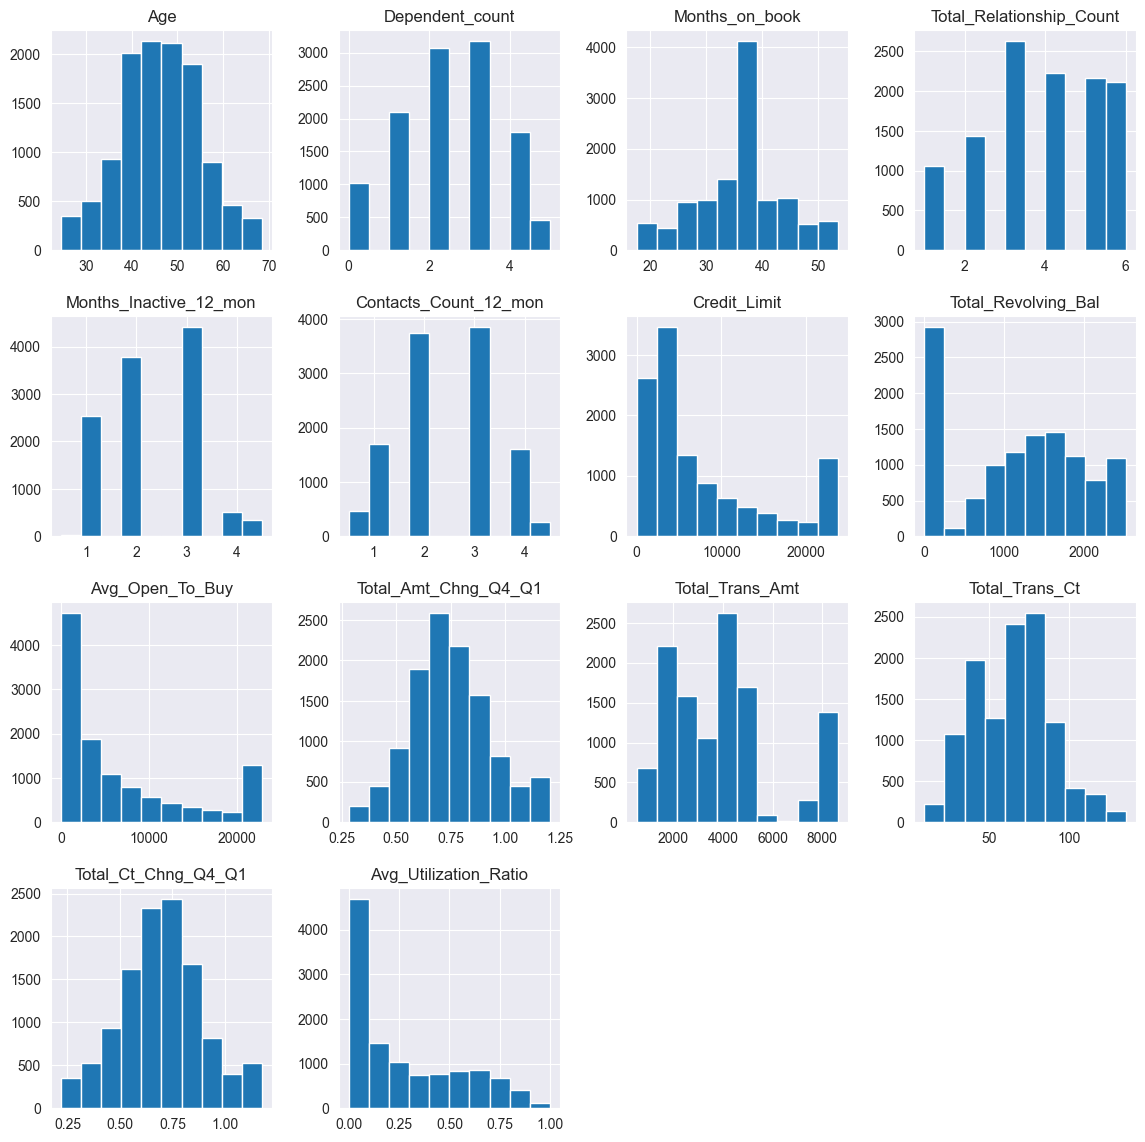

In [19]:
data_clean.hist(figsize=(14, 14))
plt.show()

- The graphs below shows an normal distribution for the age variable and, therefore, it is noticed that age variable is not impact to churn.
- 



        ## Visualizing Numerical Columns (Boxplots)
       


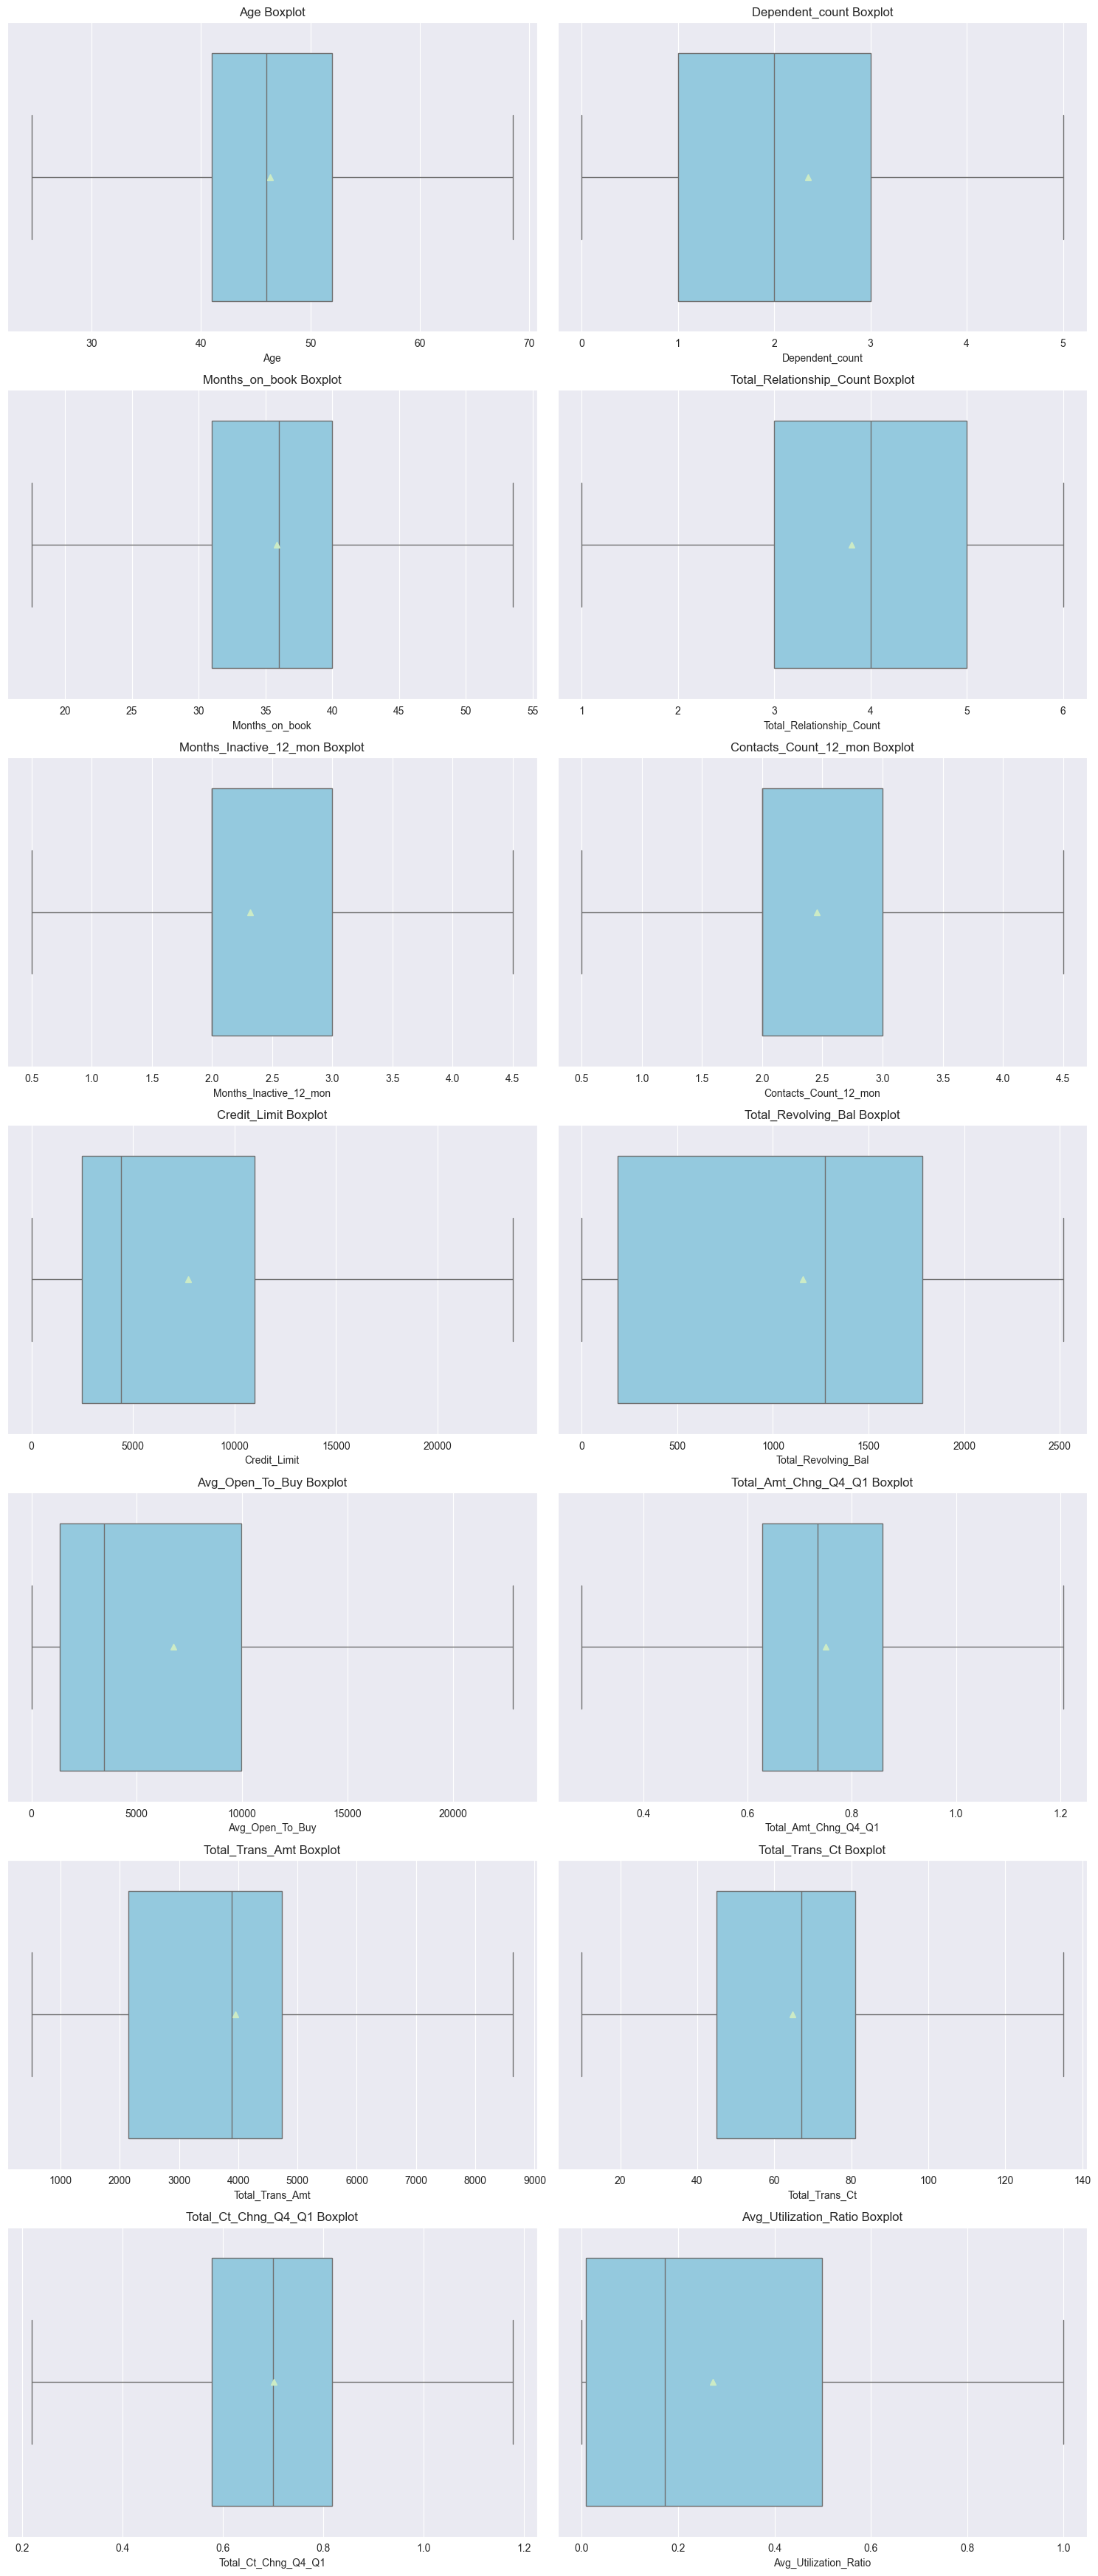

In [21]:


# Select numerical columns 
numeric_cols = data_clean.select_dtypes(include="number").columns.tolist()
# Set the number of rows and columns based on the number of plots needed
n_cols = 2  # Number of columns per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
plt.subplots_adjust(hspace=0.6)
sns.set_palette("Pastel1")

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot boxplots for each numerical column
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=data_clean[col], color="skyblue", ax=axes[i], showmeans=True)
    axes[i].set_title(f"{col} Boxplot")

# Tight layout for better spacing
plt.tight_layout()
plt.show()


## Bi Variety


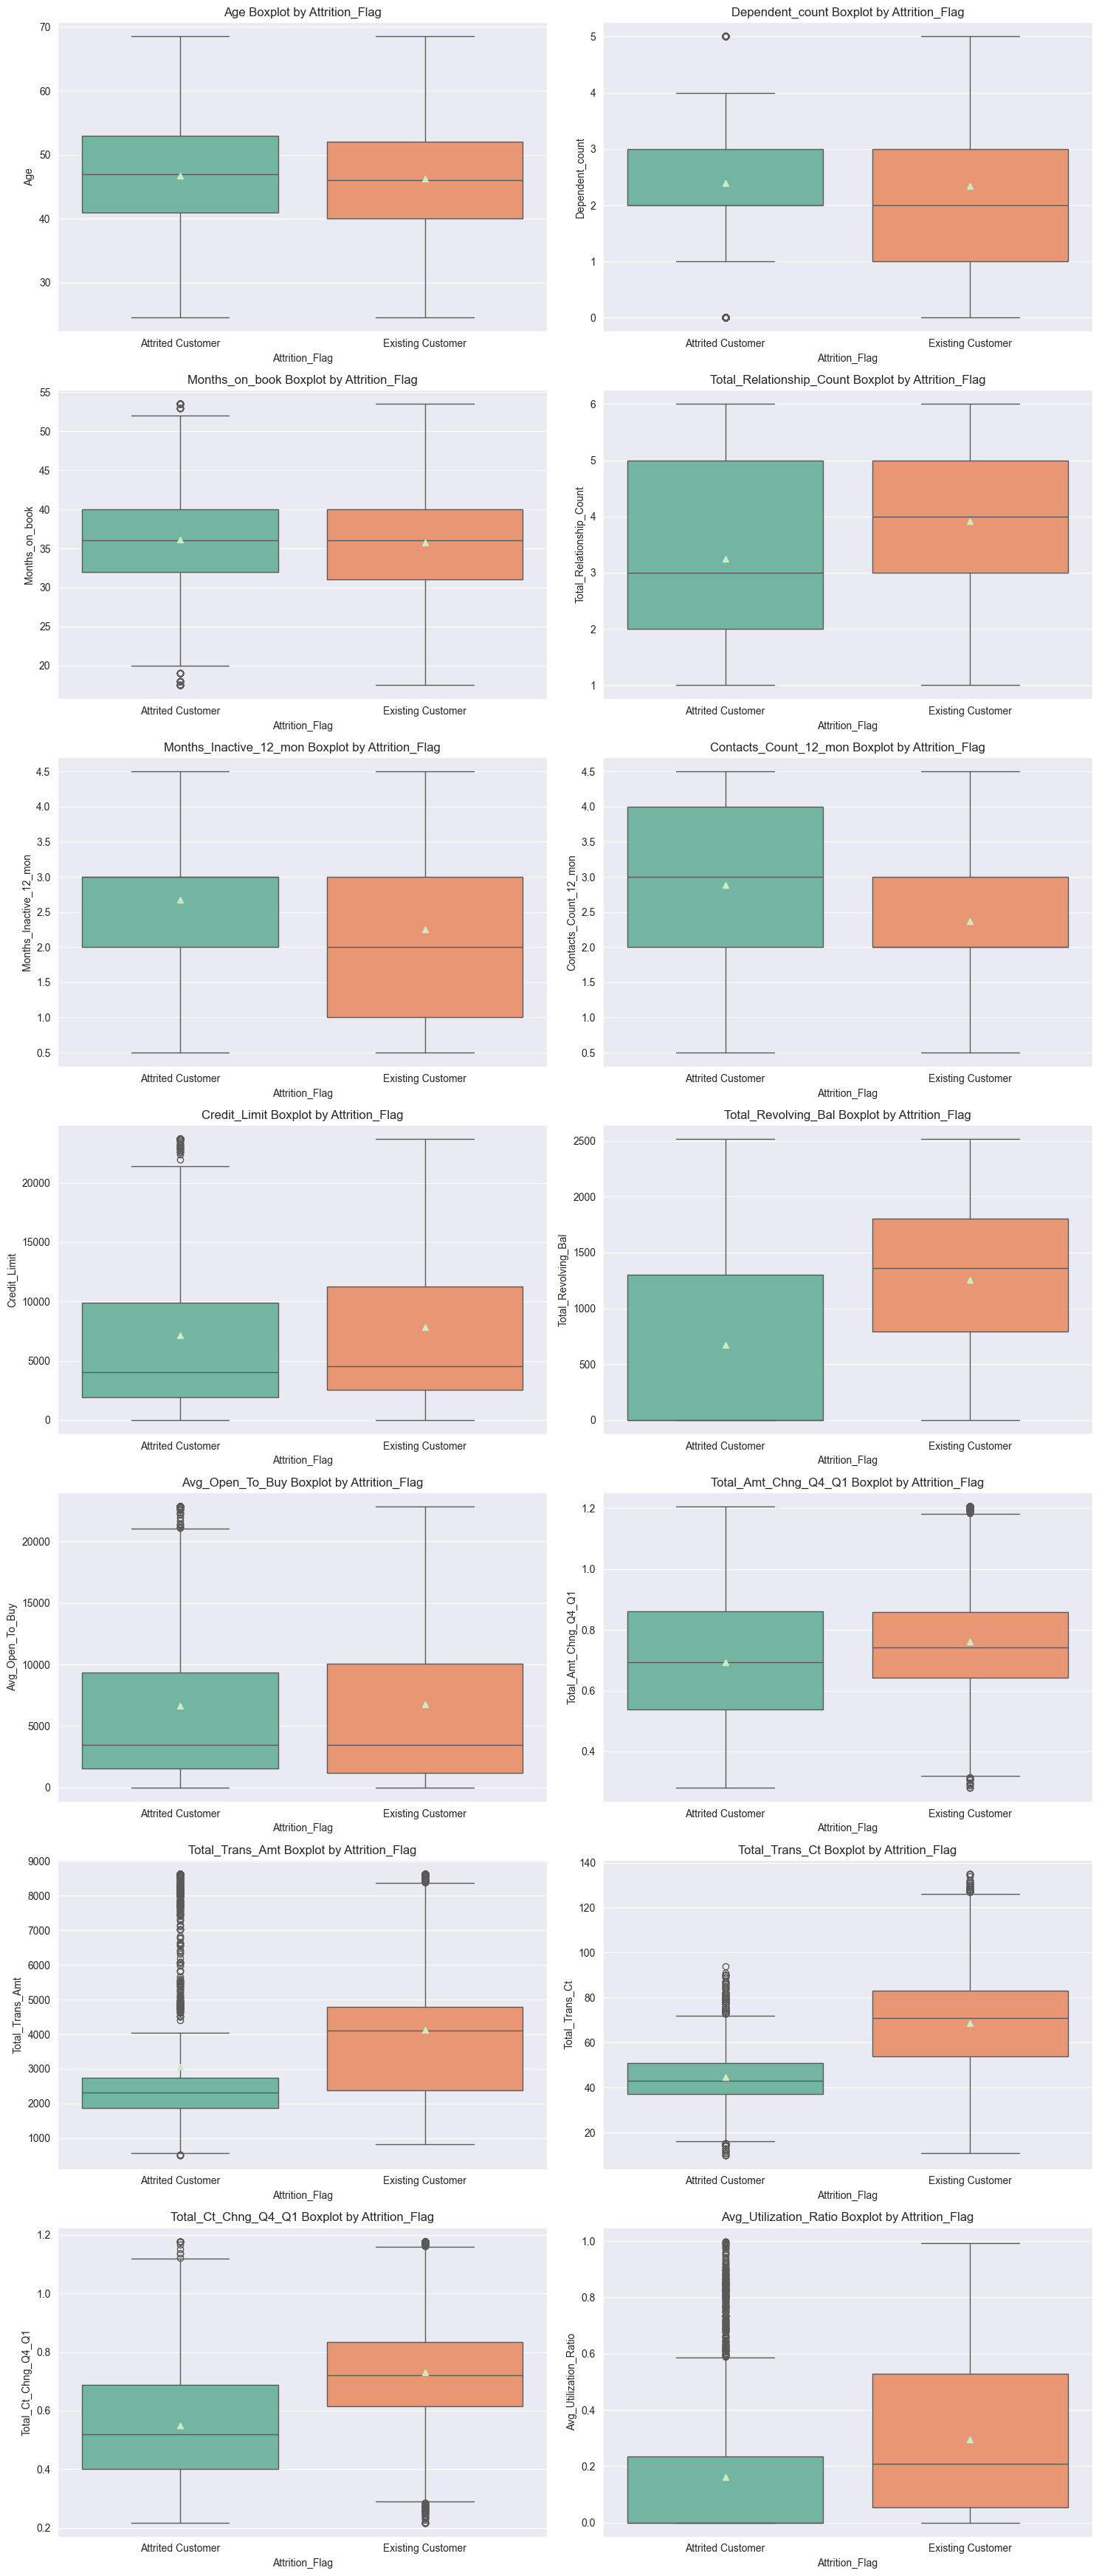

In [22]:
# Select numerical columns 
numeric_cols = data_clean.select_dtypes(include="number").columns.tolist()

# Set the number of rows and columns based on the number of plots needed
n_cols = 2  # Number of columns per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the figure for multiple subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 5))
plt.subplots_adjust(hspace=0.6)

# Plot boxplots for each numerical column, grouped by Attrition_Flag
for i, col in enumerate(numeric_cols):  
    sns.boxplot(x='Attrition_Flag', y=col, data=data_clean, ax=axes[i // n_cols, i % n_cols], showmeans=True,
                palette="Set2", hue='Attrition_Flag')
    axes[i // n_cols, i % n_cols].set_title(f"{col} Boxplot by Attrition_Flag")

# Remove any empty subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes[j // n_cols, j % n_cols])

# Tight layout for better spacing
plt.tight_layout()
plt.show()


## Correlation Analysis


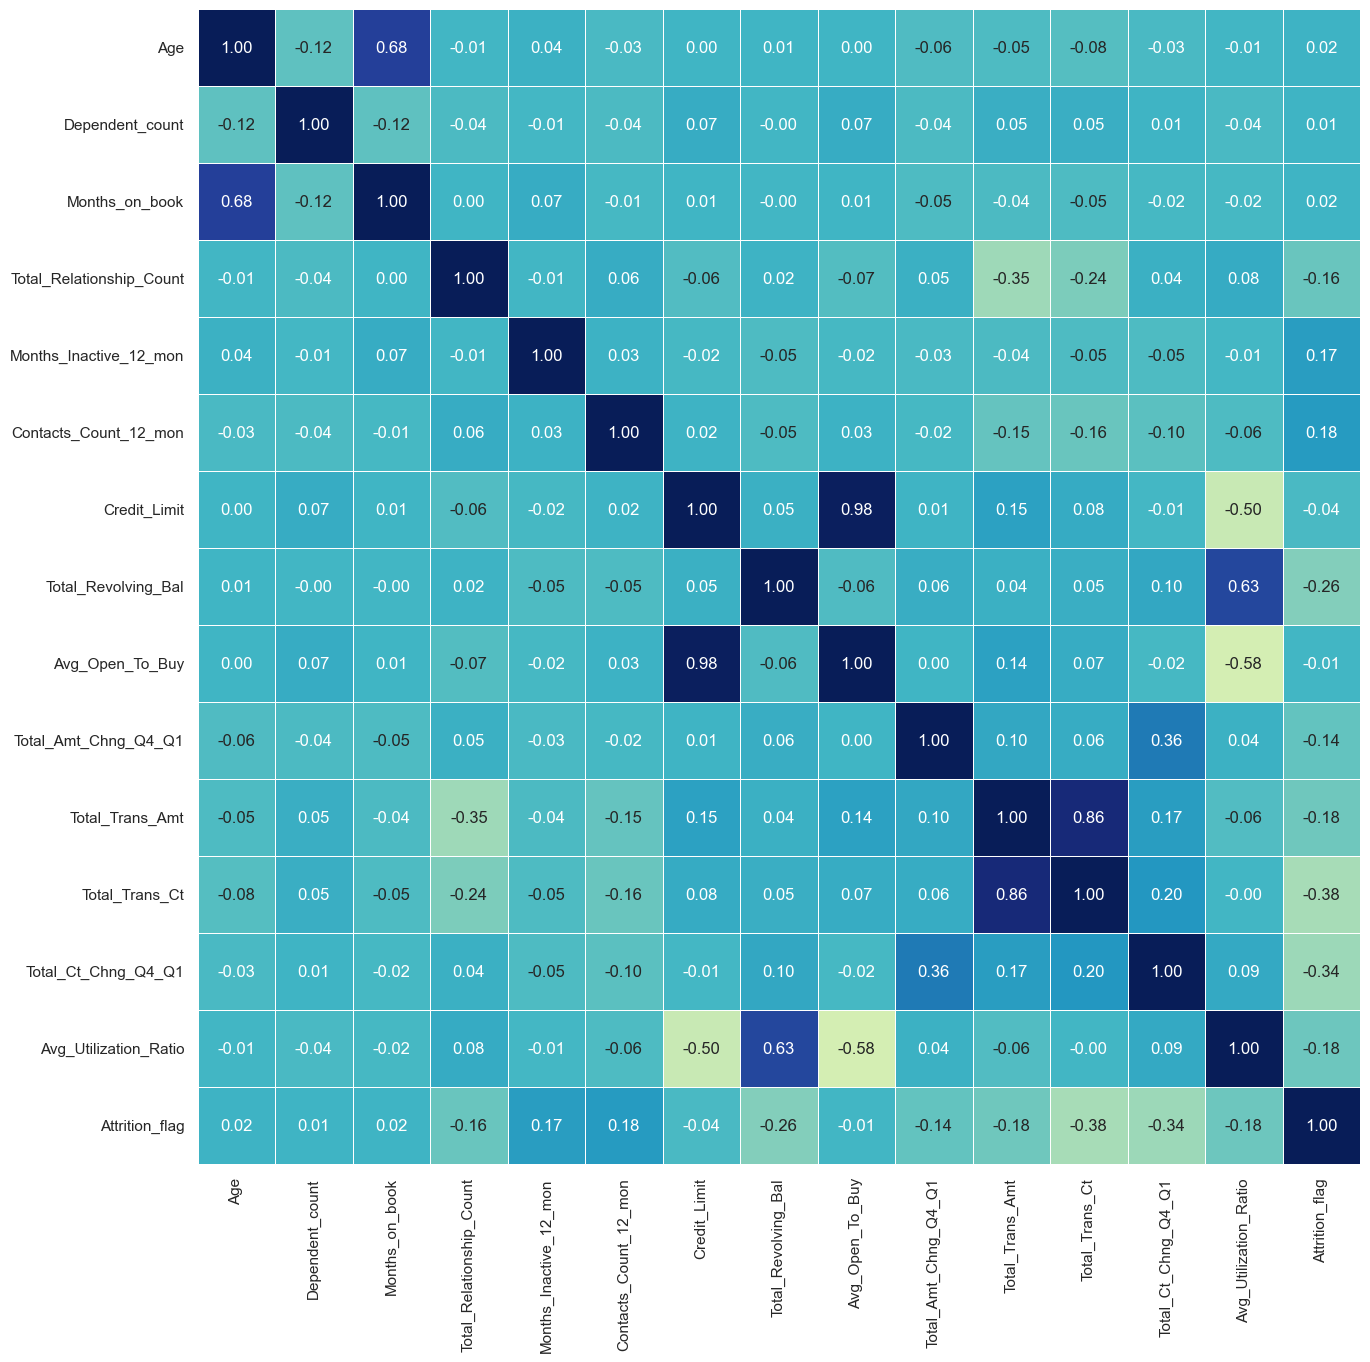

In [23]:
# Map the target variable (Attrition Flag) to numeric values
codes = {'Existing Customer': 0, 'Attrited Customer': 1}
data_clean_2 = data_clean.copy()
data_clean_2['Attrition_flag'] = data_clean_2['Attrition_Flag'].map(codes).astype(int)

# Select only numerical columns
data_clean_2 = data_clean_2.select_dtypes(include=[np.number])

# Plot a correlation heatmap
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(data_clean_2.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu", fmt="0.2f")
plt.show()

The variables **Total_Trans_Ct**, **Total_Ct_Chng_Q4_Q1** and **Total_Revolving_Bal** are the top 3 features that most directly and negatively influence the churn of customers. In other words, the higher the value of these 3 variables mentioned, the lower the churn rate of these customers.


In the other analysis spectrum, the **Contacts_Count_12_mon** and **Months_Inactive_12_mon** variables are the 2 main features that have a positive correlation with the churn target variable. This means that the higher the value of these 2 mentioned variables, the higher the churn rate of the public.

## Data Preprocessing for Model Building


In [24]:

# Label encoding for categorical variables
le = LabelEncoder()
data_clean['Income_Category_Labelled'] = le.fit_transform(data_clean['Income_Category'])
data_clean['Education_Level_Labelled'] = le.fit_transform(data_clean['Education_Level'])
data_clean['Card_Category_Labelled'] = le.fit_transform(data_clean['Card_Category'])

# Drop original categorical columns
data_clean = data_clean.drop(['Education_Level', 'Income_Category', 'Card_Category'], axis=1)

# Map 'Attrition_Flag' to binary values (1 for existing, 0 for attrited)
data_clean['Attrition_Flag'] = data_clean['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

# Create dummy variables for Gender and Marital_Status
new_df = pd.get_dummies(data_clean, columns=['Gender', 'Marital_Status'], drop_first=True, dtype='int')

# Split the dataset into features (X) and target (y)
X = new_df.drop('Attrition_Flag', axis=1)
y = new_df['Attrition_Flag']

# Split the data into training and test sets (81% train, 19% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20, stratify=y)

## Model Building


In [25]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=2000, solver='newton-cg', class_weight='balanced')
lr_model.fit(x_train, y_train)
lr_predictions = lr_model.predict(x_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

# Random Forest Classifier
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(x_train, y_train)
rf_predictions = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
#hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_grid_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, n_iter=50, cv=3, verbose=2,random_state=42, n_jobs=-1)
rf_grid_search.fit(x_train, y_train)



Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=42, verbose=2)

## evaluating performance

In [27]:
# Print accuracy for each model
print(f"Logistic Regression Accuracy: {lr_accuracy * 100:.2f}%")
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")


# Generate classification reports for both models
print("\nLogistic Regression Report:")
print(classification_report(y_test, lr_predictions))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Logistic Regression Accuracy: 86.75%
Random Forest Accuracy: 96.52%

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1940
           1       0.56      0.88      0.69       385

    accuracy                           0.87      2325
   macro avg       0.77      0.87      0.80      2325
weighted avg       0.90      0.87      0.88      2325


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1940
           1       0.95      0.83      0.89       385

    accuracy                           0.97      2325
   macro avg       0.96      0.91      0.93      2325
weighted avg       0.96      0.97      0.96      2325



In [29]:
print('Training Model accuracy: {:.2%}'.format(rf_model.score(x_train, y_train)))
print('Test Model accuracy: {:.2%}'.format(rf_model.score(x_test, y_test)))

Training Model accuracy: 99.89%
Test Model accuracy: 96.52%


## Customer Churn Prediction Probabilities

In [30]:

# Predict churn probabilities
lr_probabilities = lr_model.predict_proba(x_test)[:, 1]
rf_probabilities = rf_model.predict_proba(x_test)[:, 1]

# Create a DataFrame of customers with their churn probabilities
customers_at_risk = pd.DataFrame({
    'LR_Churn_Probability': lr_probabilities,
    'RF_Churn_Probability': rf_probabilities
})

# Average the probabilities from both models
customers_at_risk['Avg_Churn_Probability'] = (customers_at_risk['LR_Churn_Probability'] + customers_at_risk['RF_Churn_Probability']) / 2

# Sort customers by average churn probability
customers_at_risk = customers_at_risk.sort_values(by='Avg_Churn_Probability', ascending=False)

# Merge additional customer details (replace with correct column names)
customers_at_risk = customers_at_risk.merge(data[['Customer_Number', 'Age', 'Total_Trans_Amt']], left_index=True, right_index=True)

# Segment customers into risk levels
def risk_group(prob):
    if prob > 0.75:
        return 'High Risk'
    elif prob > 0.50:
        return 'Medium Risk'
    else:
        return 'Low Risk'

customers_at_risk['Risk_Level'] = customers_at_risk['Avg_Churn_Probability'].apply(risk_group)

# Sort high-risk customers for proactive intervention
high_risk_customers = customers_at_risk[customers_at_risk['Risk_Level'] == 'High Risk'].sort_values(by='Avg_Churn_Probability', ascending=False)

# Display top 20 high-risk customers with their customer details and strategies
high_risk_customers[['Customer_Number', 'Age', 'Total_Trans_Amt', 'Avg_Churn_Probability', 'Risk_Level']].head(20)



,Customer_Number,Age,Total_Trans_Amt,Avg_Churn_Probability,Risk_Level
1903,3711679383,50,2381,0.998213,High Risk
976,3709975983,46,4609,0.997424,High Risk
1961,3711778983,55,1383,0.996283,High Risk
1211,3710468883,65,1203,0.996054,High Risk
1898,3711668883,46,7307,0.993950,High Risk
606,3709239483,46,4835,0.993572,High Risk
1690,3711324183,49,1670,0.993331,High Risk
1966,3711787758,41,4173,0.992200,High Risk
1722,3711367983,47,777,0.990431,High Risk
156,3708408408,37,1377,0.989395,High Risk


Logistic Regression AUC: 0.9409264961842282
Random Forest AUC: 0.9923463649752309


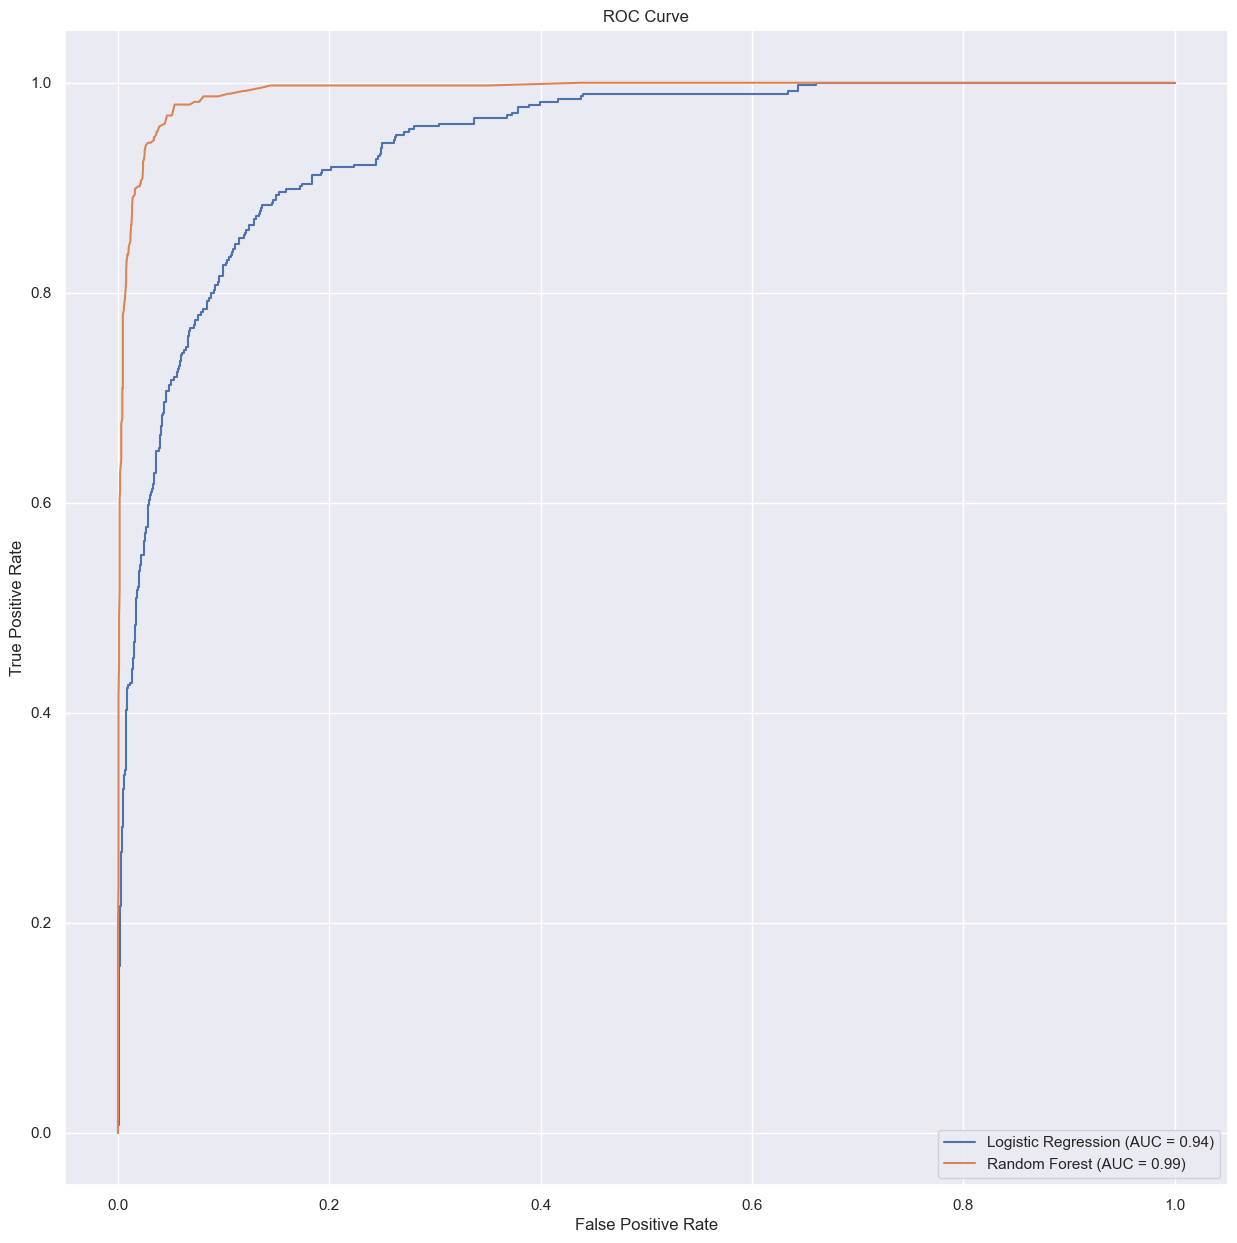

In [31]:

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probabilities)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probabilities)
lr_auc = roc_auc_score(y_test, lr_probabilities)
rf_auc = roc_auc_score(y_test, rf_probabilities)

print(f"Logistic Regression AUC: {lr_auc}")
print(f"Random Forest AUC: {rf_auc}")
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True) 
plt.show()
